# Initial Data Exploration

Inspect and visualize data loading and pre-processing code.

Based on: https://github.com/matterport/Mask_RCNN/blob/master/samples/coco/inspect_data.ipynb

In [1]:
import os
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon

ROOT_DIR = os.path.abspath("../")

sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline

Using TensorFlow backend.


## Configurations and Dataset

In [3]:

from src.dataset.ads_dataset import AdvertisementDataset, AdsConfig

config = AdsConfig()
COCO_DIR = "../data/raw"

dataset = AdvertisementDataset()
dataset.load_dataset(COCO_DIR, is_train=True)
dataset.prepare()

In [4]:
print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 82
Class Count: 4
  0. BG                                                
  1. billboard                                         
  2. signage                                           
  3. branding                                          


## Display Samples

Load and display images and masks.

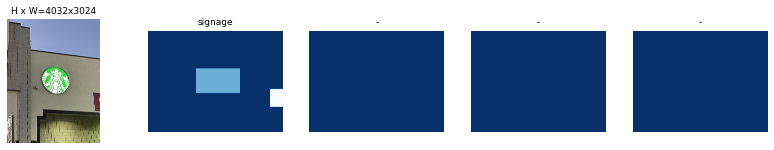

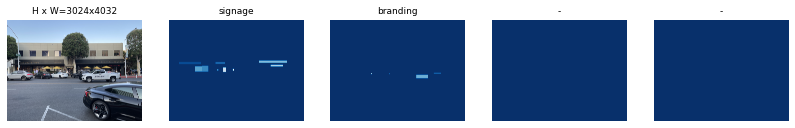

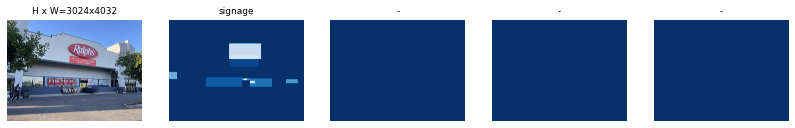

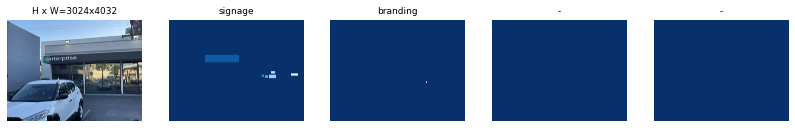

In [5]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Bounding Boxes

Rather than using bounding box coordinates provided by the source datasets, we compute the bounding boxes from masks instead. This allows us to handle bounding boxes consistently regardless of the source dataset, and it also makes it easier to resize, rotate, or crop images because we simply generate the bounding boxes from the updates masks rather than computing bounding box transformation for each type of image transformation.

image_id  43 ../data/raw/images/StudiousMemorableDesertpupfish.jpg
image                    shape: (3024, 4032, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (3024, 4032, 3)       min:    0.00000  max:    3.00000  uint8
class_ids                shape: (3,)                  min:    2.00000  max:    3.00000  int32
bbox                     shape: (3, 4)                min:  856.00000  max: 2792.00000  int32


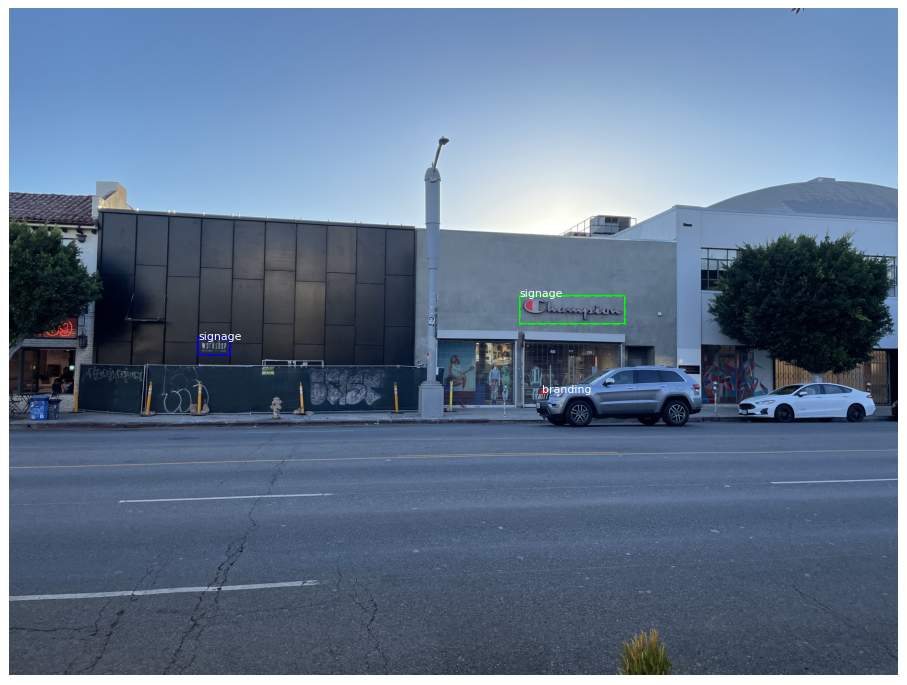

In [7]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Resize Images

To support multiple images per batch, images are resized to one size (1024x1024). Aspect ratio is preserved, though. If an image is not square, then zero padding is added at the top/bottom or right/left.

image_id:  39 ../data/raw/images/SympatheticWindingBergerpicard.jpg
Original shape:  (3024, 4032, 3)
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (512, 512, 13)        min:    0.00000  max:    3.00000  uint8
class_ids                shape: (13,)                 min:    2.00000  max:    3.00000  int32
bbox                     shape: (13, 4)               min:   38.00000  max:  448.00000  int32


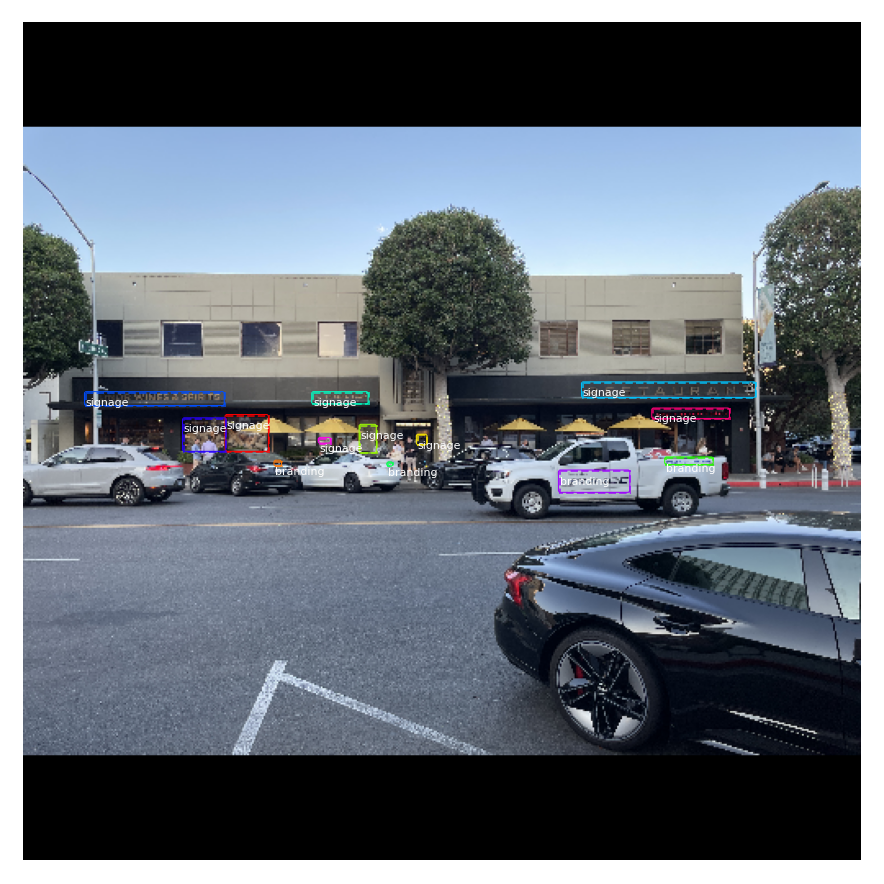

In [9]:
# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)